## Dataset preparation from online

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')

In [2]:
response = google_images_download.googleimagesdownload()
search_queries = ['happy dogs','smiling dogs','sad dogs','frown dogs']

In [3]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    print_urls=True)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [4]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 673 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 562 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 629 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 674 is all we got for this search filter!
Downloaded 671 happy dogs images!
Downloaded 562 smiling dogs images!
Downloaded 623 sad dogs images!
Downloaded 673 frown dogs images!


#### NOTE: at this stage, manually go over the downloaded files to get rid of "bad" images; this does not necessarily have to be thorough. 

### Processing into two categories

In [5]:
import shutil
data_folders = os.listdir(data_path)

source_happy = os.path.join(data_path,'smiling dogs')
dest_happy = os.path.join(data_path,'happy dogs')
source_sad = os.path.join(data_path,'frown dogs')
dest_sad = os.path.join(data_path,'sad dogs')

files_happy = os.listdir(source_happy)
files_sad = os.listdir(source_sad)
for f in files_happy:
    if not os.path.exists(os.path.join(dest_happy,f)):
        shutil.move(os.path.join(source_happy,f), dest_happy)   
for f in files_sad:
    if not os.path.exists(os.path.join(dest_sad,f)):
        shutil.move(os.path.join(source_sad,f), dest_sad)
        
shutil.rmtree(os.path.join(data_path,'smiling dogs'))
shutil.rmtree(os.path.join(data_path,'frown dogs'))

### File renaming

In [6]:
data_folders = os.listdir(data_path)
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for i in range(len(os.listdir(working_dir))):
        original_name = current_list[i]
        new_name = "".join(folder.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
        if not os.path.exists(new_name):
            os.rename(original_name,new_name)
os.chdir(original_path)

In [1]:
## dummy cells
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')
data_folders = os.listdir(data_path)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## display

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

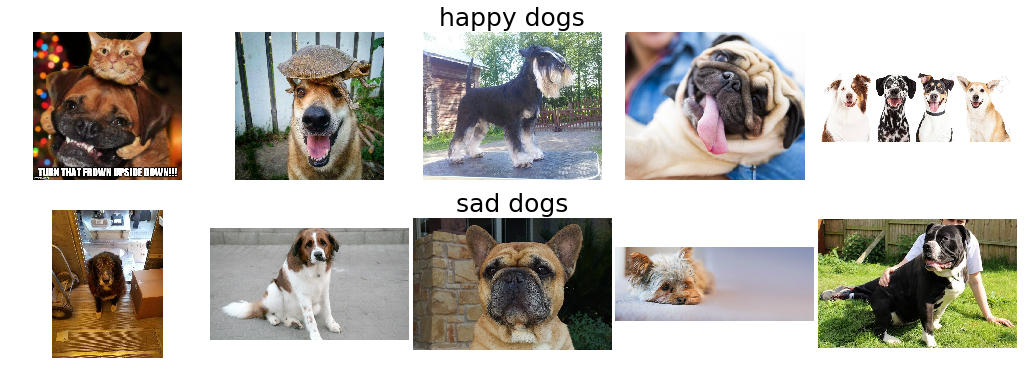

In [3]:
np.random.seed(seed=20)
n_samples = 5
fig, row = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))

for col,folder in zip(row,data_folders):
    col[int(np.floor(n_samples/2))].set_title(folder,fontsize=25)
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    for col_ax,img in zip(col,np.random.choice(os.listdir(os.getcwd()),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load and pre-processing

In [2]:
img_rows = 128
img_cols = 128
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)

### normalization

In [3]:
img_data = np.array(img_list).astype('float32')
img_label = np.array(label_list)
img_data /= 255
# img_data = np.expand_dims(img_data,axis=1) # if gray-scale used

In [4]:
print(img_data.shape)
print(img_label.shape)

(2182, 128, 128, 3)
(2182,)


## Splitting

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1963, 128, 128, 3)
y_train shape: (1963,)
X_valid shape: (109, 128, 128, 3)
y_valid shape: (109,)
X_test shape: (110, 128, 128, 3)
y_test shape: (110,)


## Model building

### directory to save best models

In [8]:
os.mkdir('best_models')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'best_models'

### import modules and params

In [17]:
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dropout,Add
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam

In [7]:
%load_ext autoreload
%autoreload 2
import helper_module as hm

In [37]:
epochs = 350
batch_size = 32
X_input_shape = img_data[0].shape
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=10,verbose=1,factor=0.7,min_lr=0.00001)

In [9]:
img_data[0].shape

(128, 128, 3)

### Model #1: arbitrary CNN - initial trial (~ResNet) with Data augmentation
As an initial model, a simple CNN with 2 conv layers and 1 fc layer is built.

In [30]:
def identity_block(n_f,x):
    shortcut = x
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut,x])
    x = Activation('relu')(x)
    return x

def conv_block(n_f,x):
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    return x

In [31]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45)
datagen.fit(X_train)

In [38]:
model_name = 'Model_1'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

inputs = Input(shape=img_data[0].shape)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
x = conv_block(64,x)
for _ in range(3):
    x = identity_block(64,x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_1 = Model(inputs,outputs)

model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
print(model_name)
hm.print_train_num_param(model_1)

Model_1
Trainable params: 334,849


In [33]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_1 = model_1.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=1,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])

Epoch 1/150
62/61 [==============================] - 7s 113ms/step - loss: 0.7355 - acc: 0.5510 - val_loss: 0.9058 - val_acc: 0.4771
Epoch 2/150
62/61 [==============================] - 4s 70ms/step - loss: 0.6845 - acc: 0.5651 - val_loss: 1.2640 - val_acc: 0.5413
Epoch 3/150
62/61 [==============================] - 5s 84ms/step - loss: 0.6805 - acc: 0.5713 - val_loss: 0.6878 - val_acc: 0.5963
Epoch 4/150
62/61 [==============================] - 5s 84ms/step - loss: 0.6899 - acc: 0.5576 - val_loss: 0.7734 - val_acc: 0.4862
Epoch 5/150
62/61 [==============================] - 5s 84ms/step - loss: 0.6800 - acc: 0.5787 - val_loss: 0.7205 - val_acc: 0.5596
Epoch 6/150
62/61 [==============================] - 5s 84ms/step - loss: 0.6795 - acc: 0.5688 - val_loss: 0.8908 - val_acc: 0.4862
Epoch 7/150
62/61 [==============================] - 5s 84ms/step - loss: 0.6703 - acc: 0.6015 - val_loss: 0.7703 - val_acc: 0.5321
Epoch 8/150
62/61 [==============================] - 5s 84ms/step - loss: 0

Epoch 61/150
62/61 [==============================] - 5s 84ms/step - loss: 0.4181 - acc: 0.8135 - val_loss: 0.7041 - val_acc: 0.7064
Epoch 62/150
62/61 [==============================] - 5s 85ms/step - loss: 0.4246 - acc: 0.7991 - val_loss: 0.6885 - val_acc: 0.6697

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.
Epoch 63/150
62/61 [==============================] - 5s 84ms/step - loss: 0.4040 - acc: 0.8247 - val_loss: 0.8421 - val_acc: 0.6881
Epoch 64/150
62/61 [==============================] - 5s 85ms/step - loss: 0.4109 - acc: 0.8021 - val_loss: 0.7984 - val_acc: 0.7156
Epoch 65/150
62/61 [==============================] - 5s 84ms/step - loss: 0.3996 - acc: 0.8233 - val_loss: 0.8397 - val_acc: 0.7064
Epoch 66/150
62/61 [==============================] - 5s 84ms/step - loss: 0.3872 - acc: 0.8290 - val_loss: 0.7357 - val_acc: 0.6972
Epoch 67/150
62/61 [==============================] - 5s 85ms/step - loss: 0.3911 - acc: 0.8232 - val_loss: 0.7563 - val

Epoch 119/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2849 - acc: 0.8811 - val_loss: 0.8730 - val_acc: 0.7248
Epoch 120/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2650 - acc: 0.8828 - val_loss: 0.8844 - val_acc: 0.7248
Epoch 121/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2873 - acc: 0.8847 - val_loss: 0.8866 - val_acc: 0.6972
Epoch 122/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2701 - acc: 0.8836 - val_loss: 0.8900 - val_acc: 0.7156

Epoch 00122: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.
Epoch 123/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2694 - acc: 0.8821 - val_loss: 0.9126 - val_acc: 0.7064
Epoch 124/150
62/61 [==============================] - 5s 84ms/step - loss: 0.2698 - acc: 0.8866 - val_loss: 0.9002 - val_acc: 0.7064
Epoch 125/150
62/61 [==============================] - 5s 83ms/step - loss: 0.2971 - acc: 0.8736 - val_loss: 0.904

110/110 [==============================] - 0s 481us/step
Valid: accuracy = 0.660550  ;  loss = 1.180494
Test: accuracy = 0.672727  ;  loss = 1.030656


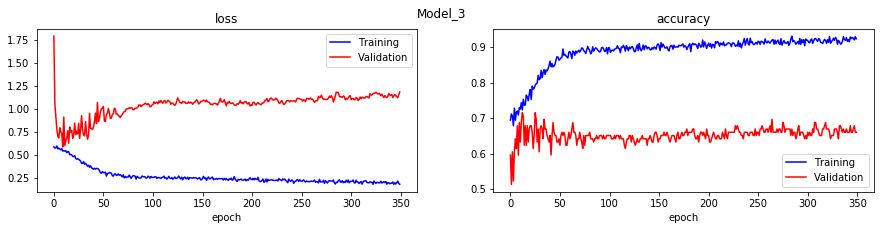

In [58]:
hm.print_valid_test_score(model_1,X_valid,y_valid,X_test,y_test) # with ~res and aug
hm.training_plot(hist_1,model_name) 

In [62]:
# y_pred = model_1.predict_classes(X_test)
# hm.confusion_matrix_plot(y_test,y_pred,model_name)

add dropout --> if still fit add in the loop

In [48]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45)
datagen.fit(X_train)
epochs = 350
model_name = 'Model_2'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

inputs = Input(shape=img_data[0].shape)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
#     x = Dropout(0.4)(x)
x = Dropout(0.5)(x)
x = conv_block(64,x)
x = Dropout(0.5)(x)
for _ in range(3):
    x = identity_block(64,x)
#     x = Dropout(0.4)(x)
x = Dropout(0.5)(x)
    
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_2 = Model(inputs,outputs)

model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
print(model_name)
hm.print_train_num_param(model_2)

Model_2
Trainable params: 334,849


In [49]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_2 = model_2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00080: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00090: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00110: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00120: ReduceLROnPlateau reducing learning rate to 1e-05.


110/110 [==============================] - 0s 417us/step
Valid: accuracy = 0.706422  ;  loss = 0.912671
Test: accuracy = 0.672727  ;  loss = 0.764716


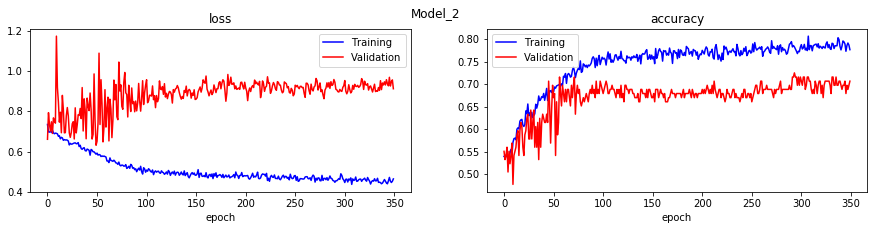

In [50]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout -- hor flip
hm.training_plot(hist_2,model_name) 

110/110 [==============================] - 0s 417us/step
Valid: accuracy = 0.743119  ;  loss = 0.717511
Test: accuracy = 0.681818  ;  loss = 0.646746


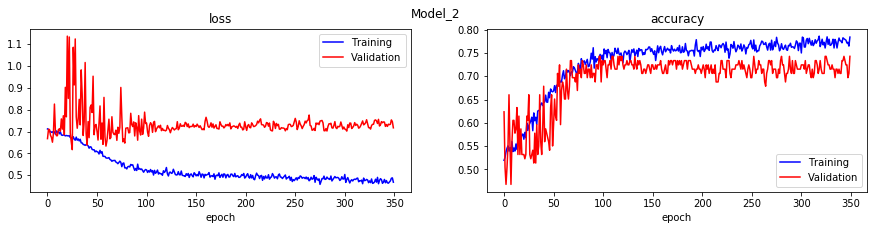

In [47]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout -- ver flip
hm.training_plot(hist_2,model_name) 

In [51]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=45)
datagen.fit(X_train)
epochs = 350
model_name = 'Model_2'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

inputs = Input(shape=img_data[0].shape)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
#     x = Dropout(0.4)(x)
x = Dropout(0.5)(x)
x = conv_block(64,x)
x = Dropout(0.5)(x)
for _ in range(3):
    x = identity_block(64,x)
#     x = Dropout(0.4)(x)
x = Dropout(0.5)(x)
    
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_2 = Model(inputs,outputs)

model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
print(model_name)
hm.print_train_num_param(model_2)

Model_2
Trainable params: 334,849


In [52]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_2 = model_2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00076: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00096: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00106: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00116: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00126: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00136: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00146: ReduceLROnPlateau reducing learning rate to 1e-05.


110/110 [==============================] - 0s 435us/step
Valid: accuracy = 0.669725  ;  loss = 0.855855
Test: accuracy = 0.636364  ;  loss = 0.798967


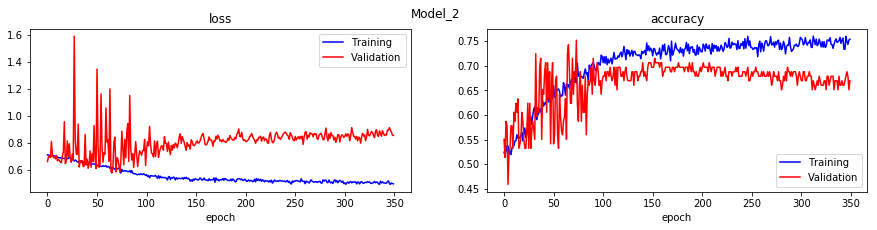

In [53]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout -- ver + hor flip
hm.training_plot(hist_2,model_name) 

## add transfer learning resnet

In [94]:
from keras.applications.vgg16 import VGG16
model_name = 'Model_3'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

model_3_bottom = VGG16(include_top=False, weights='imagenet',input_shape=X_input_shape)
model_3 = Sequential([
    model_3_bottom,
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])
print(model_name+' before freezing')
hm.print_train_num_param(model_3)

Model_4 before freezing
Trainable params: 15,763,521


In [95]:
model_3_bottom.trainable = False
print(model_name+' after freezing')
hm.print_train_num_param(model_3)

Model_4 after freezing
Trainable params: 1,048,833


In [97]:
model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_3 = model_3.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.


In [42]:
# hm.print_valid_test_score(model_3,X_valid,y_valid,X_test,y_test)
# hm.training_plot(hist_3,model_name) 

In [43]:
# y_pred = model_3.predict_classes(X_test)
# hm.confusion_matrix_plot(y_test,y_pred,model_name)

## Testing new image of Lucky!

In [102]:
from keras.models import load_model

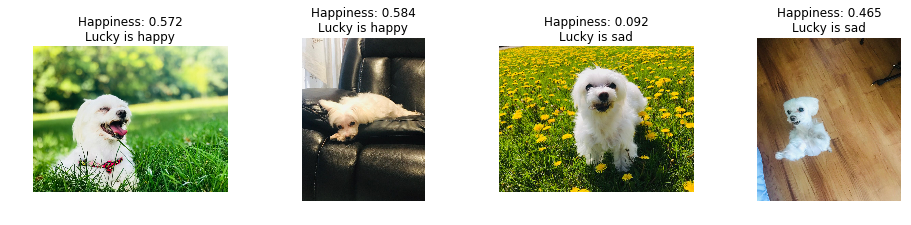

In [104]:
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_3-029-0.411-0.750.hdf5'))
fig, axes = plt.subplots(1, 4, figsize = (4*4, 3*1))
for ax,img_num in zip(axes,range(1,5)):
    img = cv2.imread('Lucky_'+str(img_num)+'.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(img_rows,img_cols)).astype('float32')
    img /= 255
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate = chosen_model.predict(img)[0][0]
    predict_class = chosen_model.predict_classes(img)[0][0]
    ax.set_title('Happiness: {:.3f}\nLucky is {}'.format(predict_rate,
                                                list(labels.keys())[list(labels.values()).index(predict_class)].split()[0]))


## To do..
* show mislabeled examples
* make the notebook using image generator
* articles about using flow and flow_from_directory